# IMPORTING THE DEPENDENCIES

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

# DATA COLLECTION AND ANALYSIS

In [146]:
# Loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/AEC ML/insurance.csv')

In [147]:
# First 5 rows of DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
# Number of rows and columns 
insurance_dataset.shape

(1338, 7)

In [149]:
# Getting Some Information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [150]:
# Checking for missing values in each column
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# DATA ANALYSIS

In [151]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


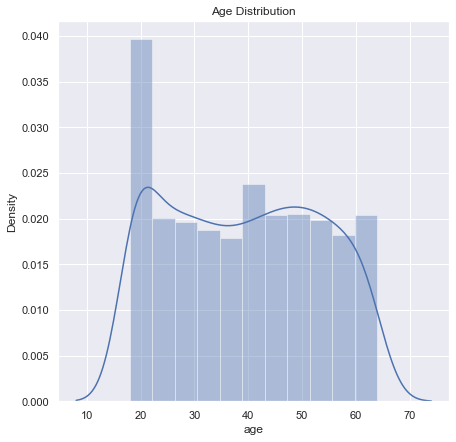

In [152]:
# Distribution of 'age' value
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

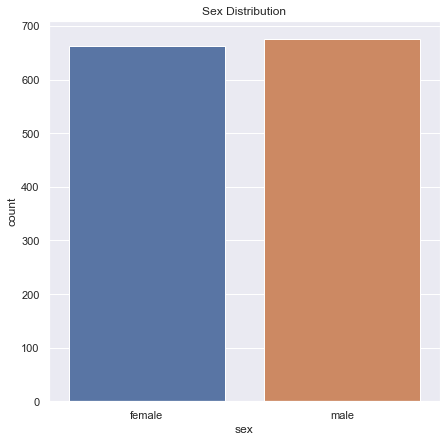

In [153]:
# Distribution of 'sex' column
plt.figure(figsize=(7,7))
sns.countplot(x='sex',data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [154]:
# Number of Males and Females
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


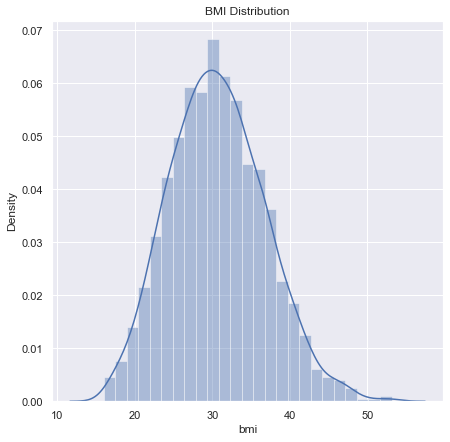

In [155]:
# Distribution of 'bmi' value
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

#### Normal BMI Range ----> 18.5 to 24.9

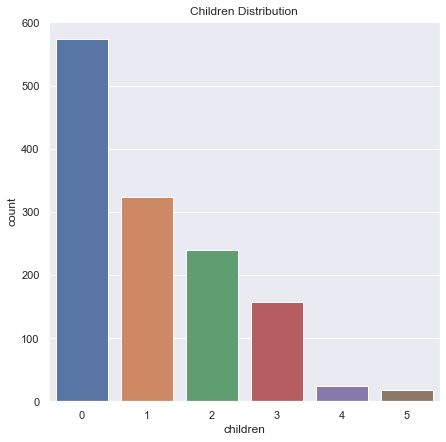

In [156]:
# Distribution of 'children' column
plt.figure(figsize=(7,7))
sns.countplot(x='children',data=insurance_dataset)
plt.title("Children Distribution")
plt.show()

In [157]:
# Number of childrens
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

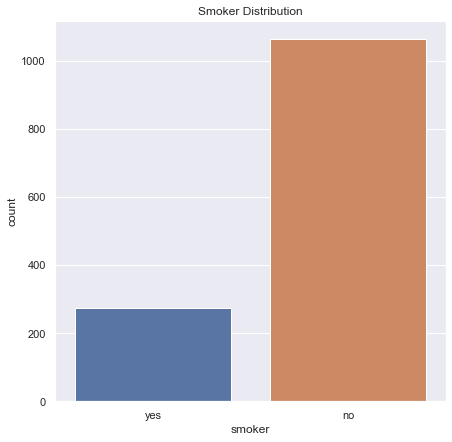

In [158]:
# Distribution of 'smoker' column
plt.figure(figsize=(7,7))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title("Smoker Distribution")
plt.show()

In [159]:
# Number of smokers
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

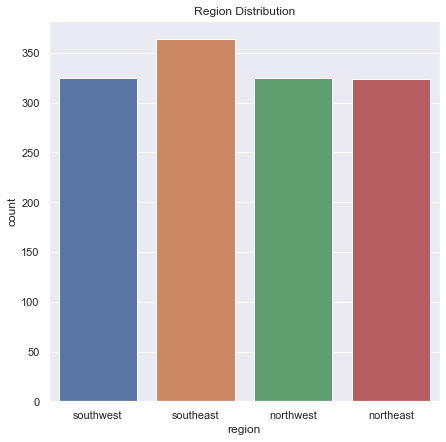

In [160]:
# Distribution of 'region' column
plt.figure(figsize=(7,7))
sns.countplot(x='region',data=insurance_dataset)
plt.title("Region Distribution")
plt.show()

In [161]:
# Number of people in each region
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


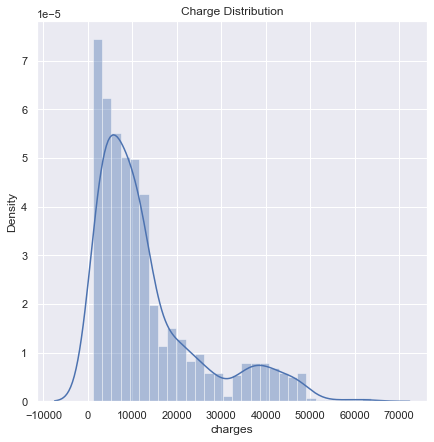

In [162]:
# Distribution of 'charges' value
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

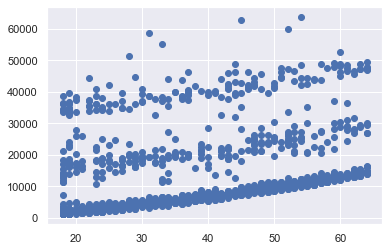

In [163]:
#scatter plot between Age and Charges
plt.scatter(insurance_dataset.age,insurance_dataset.charges)

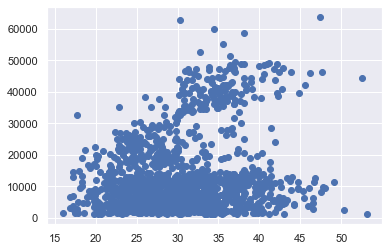

In [164]:
#scatter plot between BMI and Charges
plt.scatter(insurance_dataset.bmi,insurance_dataset.charges)

# DATA PRE-PROCESSING

### Encoding Categorical Features

In [165]:
# Encoding 'sex' column
insurance_dataset.replace({'sex':{'male':0 , 'female':1}},inplace=True)

# Encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0 , 'no':1}},inplace=True)

# Encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0 , 'southwest':1 , 'northwest':2 , 'northeast':3}},inplace=True)

In [166]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


###  SPLITTING THE FEATURES AND TARGET

In [167]:
X1 = insurance_dataset.drop(columns='charges',axis=1)
Y1 = insurance_dataset['charges']

In [168]:
print(X1)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [169]:
print(Y1)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [171]:
print(X1.shape , X_train.shape , X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# MODEL TRAINING

## LINEAR REGRESSION

In [172]:
# Loading the Linear Regression Model
regressor = LinearRegression()

In [173]:
regressor.fit(X_train , Y_train)

LinearRegression()

### MODEL EVALUATION

In [174]:
# Prediction on Training Data
training_data_prediction = regressor.predict(X_train)

In [175]:
# R Squarred Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R Squarred Value : ',r2_train)

R Squarred Value :  0.7518195459072954


In [176]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [177]:
#RMSE Value
from sklearn.metrics import mean_squared_error
rmse_linear = (np.sqrt(mean_squared_error(Y_test, test_data_prediction)))
print('RMSE : {0:.3f}'.format(rmse_linear))

RMSE : 6182.956


In [178]:
# R Squarred Value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Squarred Value : ',r2_test)
accuracy_lr = round(r2_score(Y_test,test_data_prediction),2)*100
print('Accuracy :',accuracy_lr,'%')

R Squarred Value :  0.7454471618659976
Accuracy : 75.0 %


### BUILDING A PREDICTIVE SYSTEM

In [179]:
input_data = (30,0,22.85,1,0,3)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[27756.52626698]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DECISION TREE REGRESSION

In [180]:
#Building & Loading Model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)

In [181]:
# Fitting the model
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

### MODEL EVALUATION

In [182]:
# Prediction on Training Data
train_data_prediction = dt.predict(X_train)

In [183]:
# R Squarred Value
r2_train_DT = metrics.r2_score(Y_train,train_data_prediction)
print('R Squarred Value : ',r2_train_DT)

R Squarred Value :  0.8582042344756327


In [184]:
# Prediction on Test Data
testing_data_prediction = dt.predict(X_test)

In [185]:
#RMSE Value
rmse_dt = (np.sqrt(mean_squared_error(Y_test, testing_data_prediction)))
print('RMSE : {0:.3f}'.format(rmse_dt))

RMSE : 4731.645


In [186]:
# R Squarred Value
r2_test_DT = metrics.r2_score(Y_test,testing_data_prediction)
print('R Squarred Value : ',r2_test_DT)
accuracy_dt = round(r2_score(Y_test,testing_data_prediction),2)*100
print('Accuracy :',accuracy_dt,'%')

R Squarred Value :  0.8509231896803976
Accuracy : 85.0 %


### BUILDING A PREDICTIVE SYSTEM

In [187]:
input_data = (30,0,22.85,1,0,3)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dt.predict(input_data_reshaped)
print(prediction)

[18273.37754623]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# RANDOM FOREST REGRESSION

In [188]:
#Building & Loading Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

In [189]:
# Fitting the model
rf.fit(X_train , Y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

### MODEL EVALUATION

In [190]:
# Prediction on Training Data
train_prediction = rf.predict(X_train)

In [191]:
# R Squarred Value
r2_train_RF = metrics.r2_score(Y_train,train_prediction)
print('R Squarred Value : ',r2_train_RF)

R Squarred Value :  0.8629500459242321


In [192]:
# Prediction on Test Data
test_prediction = rf.predict(X_test)

In [193]:
#RMSE Value
rmse_rf = (np.sqrt(mean_squared_error(Y_test, test_prediction)))
print('RMSE : {0:.3f}'.format(rmse_rf))

RMSE : 4610.326


In [194]:
# R Squarred Value
r2_test_RF = metrics.r2_score(Y_test,test_prediction)
print('R Squarred Value : ',r2_test_RF)
accuracy_rf = round(r2_score(Y_test,test_prediction),2)*100
print('Accuracy :',accuracy_rf,'%')

R Squarred Value :  0.8584698514558176
Accuracy : 86.0 %


### BUILDING A PREDICTIVE SYSTEM

In [195]:
input_data = (30,0,22.85,1,0,3)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

[18142.737747]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# GRADIENT BOOST REGRESSION

In [196]:
#Building & Loading Model
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=50, learning_rate =.2)
new_gbr=GradientBoostingRegressor(max_depth=3, n_estimators=50, learning_rate =.2)

In [197]:
# Fitting the model
gbr.fit(X_train , Y_train)
new_gbr.fit(X1 , Y1)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)

### MODEL EVALUATION

In [198]:
# Prediction on Training Data
training_prediction = gbr.predict(X_train)

In [199]:
# R Squarred Value
r2_train_GBR = metrics.r2_score(Y_train,training_prediction)
print('R Squarred Value : ',r2_train_GBR)

R Squarred Value :  0.9052167524729932


In [200]:
# Prediction on Test Data
testing_prediction = gbr.predict(X_test)

In [201]:
#RMSE Value
rmse_gbr = (np.sqrt(mean_squared_error(Y_test, testing_prediction)))
print('RMSE : {0:.3f}'.format(rmse_gbr))

RMSE : 4442.966


In [202]:
# R Squarred Value
r2_test_GBR = metrics.r2_score(Y_test,testing_prediction)
print('R Squarred Value : ',r2_test_GBR)
accuracy_gbr = round(r2_score(Y_test,testing_prediction),2)*100
print('Accuracy :',accuracy_gbr,'%')

R Squarred Value :  0.8685587700508713
Accuracy : 87.0 %


In [203]:
#Final Model Testing
final_prediction = new_gbr.predict(X1)
#RMSE Value
new_rmse_gbr = (np.sqrt(mean_squared_error(Y1, final_prediction)))
print('RMSE : {0:.3f}'.format(new_rmse_gbr))
# R Squarred Value
new_r2_test_GBR = metrics.r2_score(Y1,final_prediction)
print('R Squarred Value : ',new_r2_test_GBR)
new_accuracy_gbr = round(r2_score(Y1,final_prediction),2)*100
print('Accuracy :',new_accuracy_gbr,'%')

RMSE : 3784.510
R Squarred Value :  0.9022639375906064
Accuracy : 90.0 %


### BUILDING A PREDICTIVE SYSTEM

In [212]:
 input_data = (50,0,26.45,1,0,3)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = gbr.predict(input_data_reshaped)
print(prediction)

[24129.79352756]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### MODEL EVALUATION COMPARISON

In [205]:
models = [('Linear Regression', rmse_linear, r2_train, r2_test, accuracy_lr),
          ('Decision Tree Regression', rmse_dt, r2_train_DT, r2_test_DT, accuracy_dt),
          ('Random Forest Regression', rmse_rf, r2_train_RF, r2_test_RF, accuracy_rf),
          ('Gradient Boost Regression', rmse_gbr, r2_train_GBR, r2_test_GBR, accuracy_gbr)]

In [206]:
prediction = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Accuracy(%)'])
prediction

,Model,RMSE,R2_Score(training),R2_Score(test),Accuracy(%)
0,Linear Regression,6182.955535,0.751820,0.745447,75.0
1,Decision Tree Regression,4731.645479,0.858204,0.850923,85.0
2,Random Forest Regression,4610.325967,0.862950,0.858470,86.0
3,Gradient Boost Regression,4442.965681,0.905217,0.868559,87.0


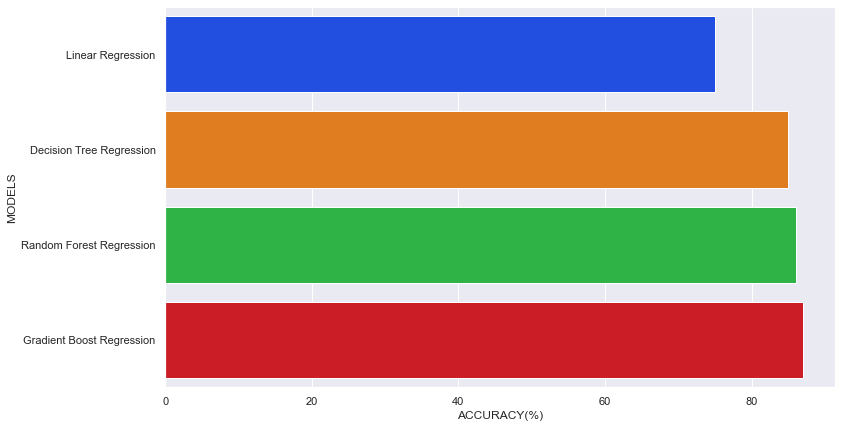

In [207]:
# Plotting of model performance
plt.figure(figsize=(12,7))
prediction.sort_values(by=['Accuracy(%)'], ascending=True, inplace=True)

sns.barplot(x='Accuracy(%)', y='Model',data = prediction, palette='bright')
plt.xlabel('ACCURACY(%)')
plt.ylabel('MODELS')
plt.show()

# Saving the Trained Model

In [208]:
import pickle

In [209]:
filename = 'welltrained_model.sav'
pickle.dump(gbr, open(filename, 'wb'))

In [210]:
#Loading the Saved Model

loaded_model = pickle.load(open('welltrained_model.sav', 'rb'))

In [213]:
input_data = (50,0,22.85,1,0,3)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print('$',prediction)

$ [23810.13536424]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
